In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [5]:
# Import data (Make sure to parse dates. Setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

# Clean data by removing extreme outliers.
df = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

display(df)


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


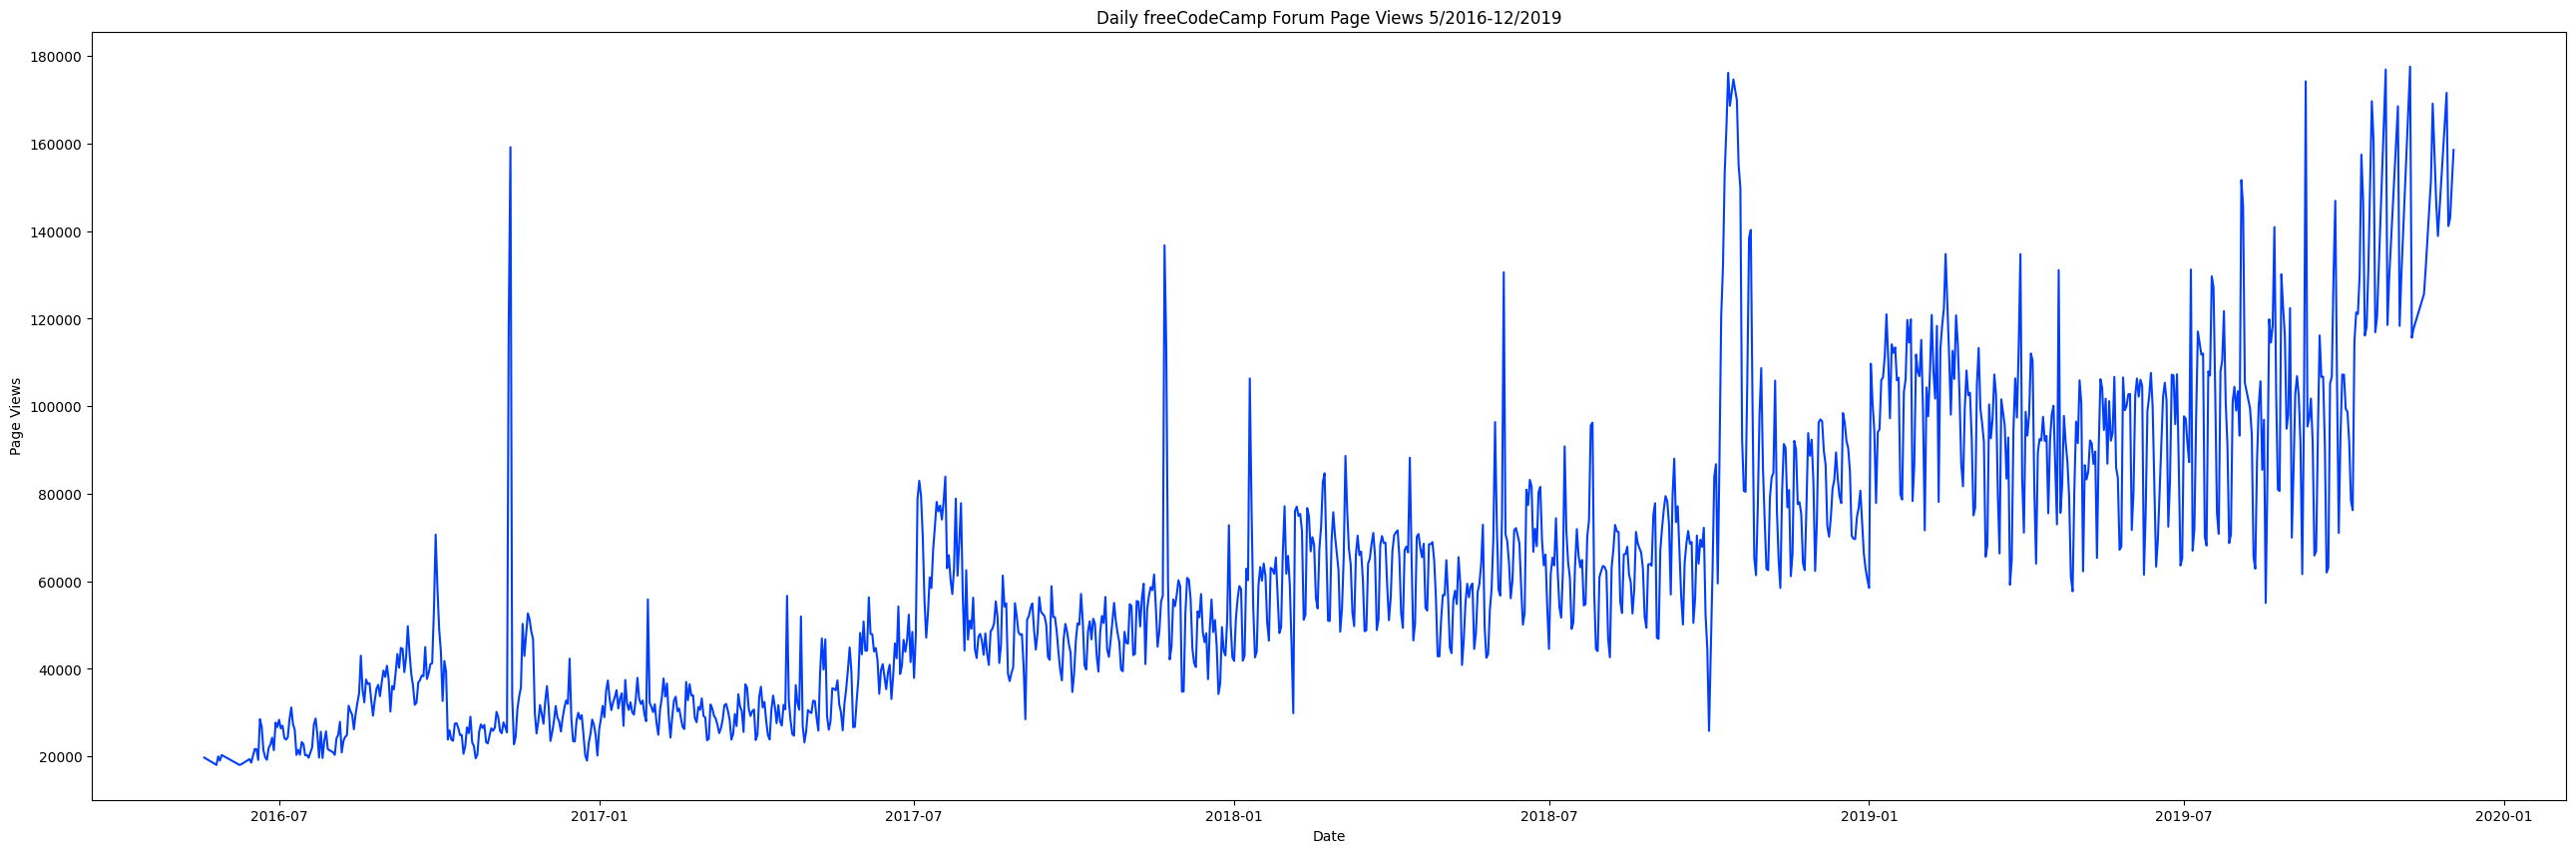

In [7]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32,10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, palette="bright", legend=False)

    fig.savefig('line_plot.png')

draw_line_plot()


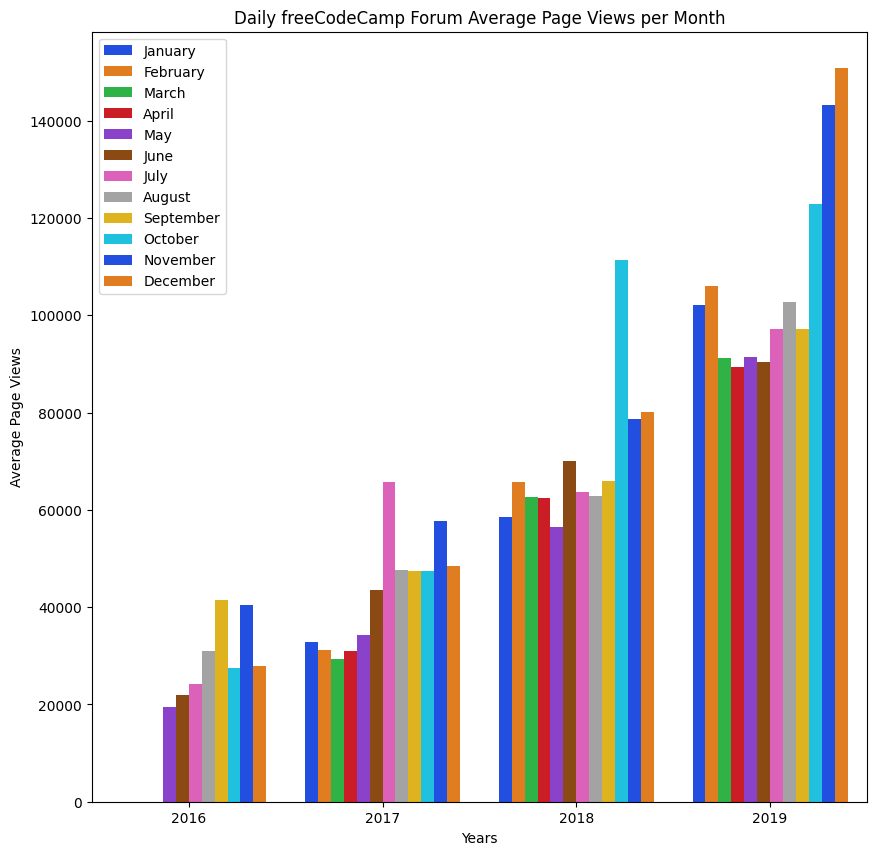

In [8]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month

    df_bar = pd.DataFrame(df_bar.groupby(["year", "month"], sort=False)["value"].mean().round().astype(int))
    df_bar = df_bar.rename(columns={"value": "page-views"})
    df_bar = df_bar.reset_index()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    ax = sns.barplot(data=df_bar, x="year", y="page-views", hue="month", palette="bright")
    handlabs = ax.get_legend_handles_labels()
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(handles=handlabs[0], labels=["January", "February", "March", "April", "May", "June", "July",
               "August", "September", "October", "November", "December"])

    fig.savefig('bar_plot.png')

draw_bar_plot()


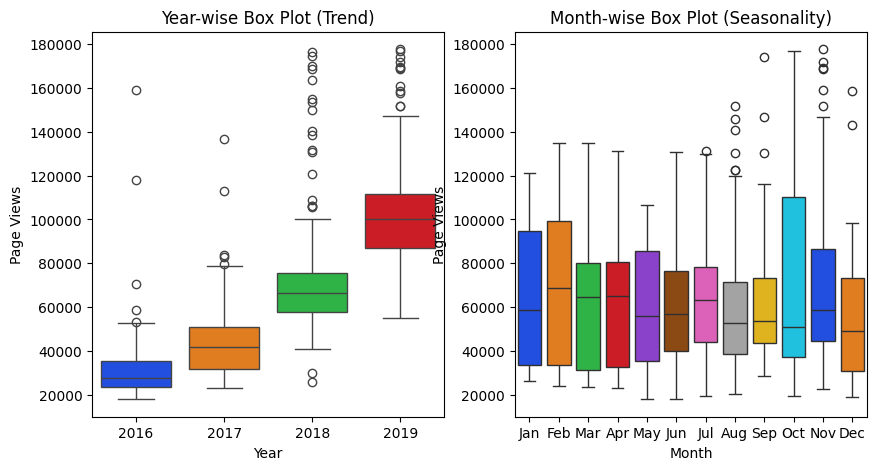

In [14]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box["year"] = df_box.index.year
    df_box['month'] = [d.strftime('%b') for d in df_box.index]
    df_box["month_num"] = df_box.index.month
    df_box = df_box.reset_index()
    df_box = df_box.sort_values("month_num")

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(figsize=(10,5), ncols=2)
    ax[0] = sns.boxplot(data=df_box, x="year", y="value", ax=ax[0], hue="year", palette="bright", legend=False)
    ax[1] = sns.boxplot(data=df_box, x="month", y="value", ax=ax[1], hue="month", palette="bright", legend=False)

    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")

    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")

    fig.savefig('box_plot.png')

draw_box_plot()
